**Importing all the necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud
from IPython.display import Image
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
%matplotlib inline

In [ ]:
data = pd.read_csv("/content/dev.tsv", sep='\t', header=None, names=['Text', 'Class', 'ID'])

In [ ]:
data.shape

(5426, 3)

In [ ]:
data.head()

Text Class       ID
0  Is this in New Orleans?? I really feel like th...    27  edgurhb
1  You know the answer man, you are programmed to...  4,27  ee84bjg
2               I've never been this sad in my life!    25  edcu99z
3  The economy is heavily controlled and subsidiz...  4,27  edc32e2
4  He could have easily taken a real camera from ...    20  eepig6r

**Finding null values using isnull() function**


In [ ]:
data.isnull().sum()

Text     0
Class    0
ID       0
dtype: int64

In [ ]:
data["Class"].value_counts()

27             1592
0               326
15              261
4               258
10              212
1               208
18              173
3               164
7               164
20              119
2               109
17              106
6               102
5                96
26               95
9                91
25               84
22               74
11               61
14               58
8                52
13               52
2,3              46
24               40
0,15             30
4,27             26
0,4              24
3,10             21
12               20
7,27             20
3,27             19
0,18             17
10,27            15
6,7              14
1,27             12
3,9              12
9,25             12
0,17             11
5,27             11
1,17             11
0,27             10
6,27             10
15,18             9
21                9
13,17             9
4,20              9
15,20             9
0,20              9
23                8
19                8


In [ ]:
data.dataframeName = 'train.tsv'

In [ ]:
data['List of classes'] = data['Class'].apply(lambda x: x.split(','))

In [ ]:
data

Text        Class       ID  \
0     Is this in New Orleans?? I really feel like th...           27  edgurhb   
1     You know the answer man, you are programmed to...         4,27  ee84bjg   
2                  I've never been this sad in my life!           25  edcu99z   
3     The economy is heavily controlled and subsidiz...         4,27  edc32e2   
4     He could have easily taken a real camera from ...           20  eepig6r   
5     Thank you for your vote of confidence, but we ...           15  eczm50f   
6     Wah Mum other people call me on my bullshit an...            2  ed4yr9r   
7                                          There it is!           27  ede4v0m   
8     At least now [NAME] has more time to gain his ...           20  eekez9p   
9     Good. We don't want more thrash liberal offspr...           10  ee0fxpu   
10    It's better to say a moment like that could tr...           18  eelgxk0   
11    I went to a destination wedding being the only...        12,22  eczyj0h   
12                  He died 4 days later of dehydration           16  edwloev   
13    Like this just cuz of the [NAME] rhymes backgr...           27  eebwc0c   
14    Lol dream on buddy. You’ve had enough attentio...       1,3,25  ed2znun   
15    As an anesthesia resident this made me blow ai...          2,3  ee2piwu   
16    1-2-3-4 I declare a thumb war! Dangit [NAME], ...           25  edgygzk   
17    Did you hear the reason for this? Because they...           27  ed8a2zl   
18                   [NAME] is such a legendary daddy 😩           27  eewv8u8   
19    I don't necessarily hate them, but then again,...         3,10  ed4m2jt   
20    Hoarders unite! 2388 stars here, 19 rewards, 2...            9  eehtttu   
21    downvoted to hell but i understand your experi...            0  eeb65ah   
22    you arent a real 90's kid if you were born aft...           10  eesyofj   
23                                Say that you like her         5,27  ef4hd8o   
24                           BLOCK BLOCK BLOCK his ass!           27  eefepyp   
25    oh shoot, im sorry to hear that. was it someon...         7,24  ed2qbu3   
26            You're really stupid if you believe that.            3  ed9udb9   
27    I'm a dudes, he's a dudes, she's a dudes, we'r...           27  eerpxg7   
28         Thank you. I really appreciate your response         0,15  eczdvun   
29                           Kawhi and Siakam chemistry           27  edlscae   
30    Two overtime games on championship Sunday? We ...           17  eelb72t   
31    i have bought this but not played. i'm scared....           14  efg7lsu   
32    This thing going to be a boon doggle. The last...           27  ef0x67w   
33    I checked the dudes profile before I posted th...           27  eedaw1d   
34    Oh dear, The combination of drugs, alcohol and...           24  ef3ip3n   
35                *[NAME] making [NAME] even more sad.*           25  ef4jj65   
36                               At least it’s not malk           27  eewz9u8   
37    Ehhh, it's an opinion, it's not wrong or right...           10  ed8ia0o   
38    Your 'brother' had texted alot of girls and en...            1  ed1xr1s   
39    Lots of them to mature. Thank you for half baked?           15  edtr45k   
40    Only 5 hour drive..... I guess im doing a day ...           18  edz9687   
41    Thank you for this! FA and the draft are excit...           15  ee134mp   
42              You're right. Sorry for the poor reply.           24  efdo8nb   
43    Still don’t know how [NAME] said him and [NAME...            7  edewppy   
44    Unfortunately, we do not routinely keep 20 lit...           27  eebcjd6   
45                       Pretty fuking sure exit scam..          3,4  ef9wfsk   
46           Trust me man. Don't see it. It's scarring.           14  edckh6b   
47    They could've added two dots and a line and it...           27  efgb529   
48    It picks you What I would do is try out everyo...            8  ee035ml   
4

In [ ]:
data['Length of classes'] = data['List of classes'].apply(lambda x: len(x))

In [ ]:
data['Length of classes'].max()

4

In [ ]:
data[data['Length of classes'] == 4]

Text        Class       ID  \
56    I am confused. I don't understand how that rel...     1,6,7,24  efb6lk2   
1027          Let the liar lie, it's more fun to watch.    1,4,13,17  eegp03i   
1112  At the very least, I’m glad he tried something...   4,17,22,23  edin7u8   
3175  What a beautiful message - it's all about love...   0,13,18,20  eeqjkd9   
3775  I’m sorry. He’s in a better place. I hope you ...    5,8,20,25  efdq4dl   
4355  Happiest of birthdays, hope you can share it w...  13,17,18,20  ed8f6ed   
5301  Wow... never heard of that podcast. Looks awes...   0,13,15,26  eepbbrp   

       List of classes  Length of classes  
56       [1, 6, 7, 24]                  4  
1027    [1, 4, 13, 17]                  4  
1112   [4, 17, 22, 23]                  4  
3175   [0, 13, 18, 20]                  4  
3775    [5, 8, 20, 25]                  4  
4355  [13, 17, 18, 20]                  4  
5301   [0, 13, 15, 26]                  4

**Below code is using the Plotly library in Python to create a bar chart to display the count of occurrences for each class number in the "Length of classes" column of data.**

In [ ]:

import plotly.graph_objects as go
temp_df = data["Length of classes"].value_counts().sort_index()

trace1 = go.Bar(
                x = ['1','2','3','4','5'],
                y = temp_df.tolist(),
                marker = dict(color = 'rgb(66, 103, 178)',
                              line=dict(color='rgb(0, 0, 0)',width=0.5)),
                text=temp_df.tolist(), textposition='outside',
                width=[0.5, 0.5, 0.5, 0.5, 0.5])
layout = go.Layout(template= "plotly_white",title = 'Number of classes' , xaxis = dict(title = 'Class Numbers'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

**Split the data into training and testing sets.**

In [ ]:
from sklearn.model_selection import train_test_split 
X = data['Text']
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Applying all the preprocessing steps like stemming,lemmatization and stop word removal**

In [ ]:
import string
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
# Load the trained model
# For example, if you have used MultinomialNB from scikit-learn:
# model = MultinomialNB()
# model.fit(X_train, y_train)
# #model.load_model('trained_model.pkl')  # Replace with the path to your trained model

# Preprocess the text data
def preprocess_text(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    ps = PorterStemmer()
    tokens = [ps.stem(word) for word in tokens]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    text = ' '.join(tokens)
    return text

X_train_1 = X_train.apply(preprocess_text)
X_test_1 = X_test.apply(preprocess_text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
#data_train.drop(['Class', 'ID', 'List of classes', 'Length of classes'], axis=1, inplace =True)

In [ ]:
data.head()

Text Class       ID  \
0  Is this in New Orleans?? I really feel like th...    27  edgurhb   
1  You know the answer man, you are programmed to...  4,27  ee84bjg   
2               I've never been this sad in my life!    25  edcu99z   
3  The economy is heavily controlled and subsidiz...  4,27  edc32e2   
4  He could have easily taken a real camera from ...    20  eepig6r   

  List of classes  Length of classes  
0            [27]                  1  
1         [4, 27]                  2  
2            [25]                  1  
3         [4, 27]                  2  
4            [20]                  1

In [ ]:
from typing_extensions import dataclass_transform
emotions_map = {}
with open('/content/gotext.txt', 'r') as f:
    for i,emotion in enumerate(f):
        emotions_map[str(i)] = emotion.strip()

In [ ]:
for i in emotions_map:
    data[emotions_map[i]] = data['List of classes'].apply(lambda x: 1 if i in x else 0)

In [ ]:
data.to_csv("processed_train.csv", index=False)
emotion_list = list(emotions_map.values())

**The below code display the count of occurrences for each emotion in the dataset**

In [ ]:
temp_list = data.drop(['Text'], axis=1).sum(axis=0).tolist()
acuracy= 0.56
trace1 = go.Bar(
                x = emotion_list,
                y = temp_list,
                marker = dict(color = 'rgb(66, 103, 178)',
                              line=dict(color='rgb(0, 0, 0)',width=1.5)),
                text=temp_list, textposition='outside')
layout = go.Layout(template= "plotly_white",title = 'NUMBER OF EMOTIONS' , xaxis = dict(title = 'Emotion'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

In [ ]:
data_emotions = pd.read_csv('/content/emotion_words.csv')

In [ ]:
data_emotions.head()

emotion       word   odds   freq
0  admiration      great  41.80  0.014
1  admiration    awesome  31.18  0.007
2  admiration    amazing  29.65  0.006
3  admiration       good  26.87  0.016
4  admiration  beautiful  22.87  0.004

In [ ]:
wc_dict = {}

In [ ]:
for i in data_emotions['emotion'].unique():
    wc_dict[i] = {}
    odds_list = data_emotions[data_emotions['emotion'] == i]['odds'].tolist()
    word_list = data_emotions[data_emotions['emotion'] == i]['word'].tolist()
    wc_dict[i] = dict(dict(zip(word_list,odds_list)))

In [ ]:
wc_dict

{'admiration': {'great': 41.8,
  'awesome': 31.18,
  'amazing': 29.65,
  'good': 26.87,
  'beautiful': 22.87,
  'nice': 20.57,
  'appreciate': 17.56,
  'cute': 17.55,
  'best': 17.26,
  'pretty': 13.86,
  'fantastic': 13.15,
  'cool': 10.94,
  'excellent': 10.83,
  'brilliant': 9.96,
  'adorable': 9.89,
  'wonderful': 9.85,
  'incredible': 9.79,
  'job': 9.77,
  'gorgeous': 9.58,
  'impressive': 9.55,
  'wow': 9.23,
  'looks': 8.41,
  'perfect': 8.2,
  'congrats': 8.17,
  'handsome': 7.9,
  'such': 7.7,
  'impressed': 7.66,
  'appreciated': 7.36,
  'genius': 7.23,
  'congratulations': 7.21,
  'interesting': 7.18,
  'proud': 6.85,
  'sweet': 6.6,
  'very': 6.53,
  'favorite': 6.49,
  'delicious': 6.42,
  'sexy': 6.21,
  'legend': 6.15,
  'super': 6.14,
  'stunning': 6.05,
  'brave': 5.56,
  'glorious': 5.35,
  'this': 5.35,
  'ever': 5.23,
  'really': 5.18,
  'greatest': 5.13,
  'beauty': 5.13,
  'art': 4.89,
  'applaud': 4.82,
  'honesty': 4.81,
  'idea': 4.7,
  'nailed': 4.49,
  'smar

In [ ]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(20, 10))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

In [ ]:
wordcloud = WordCloud(width = 500, height = 300, random_state=1, background_color='white', colormap='Set2', collocations=False)

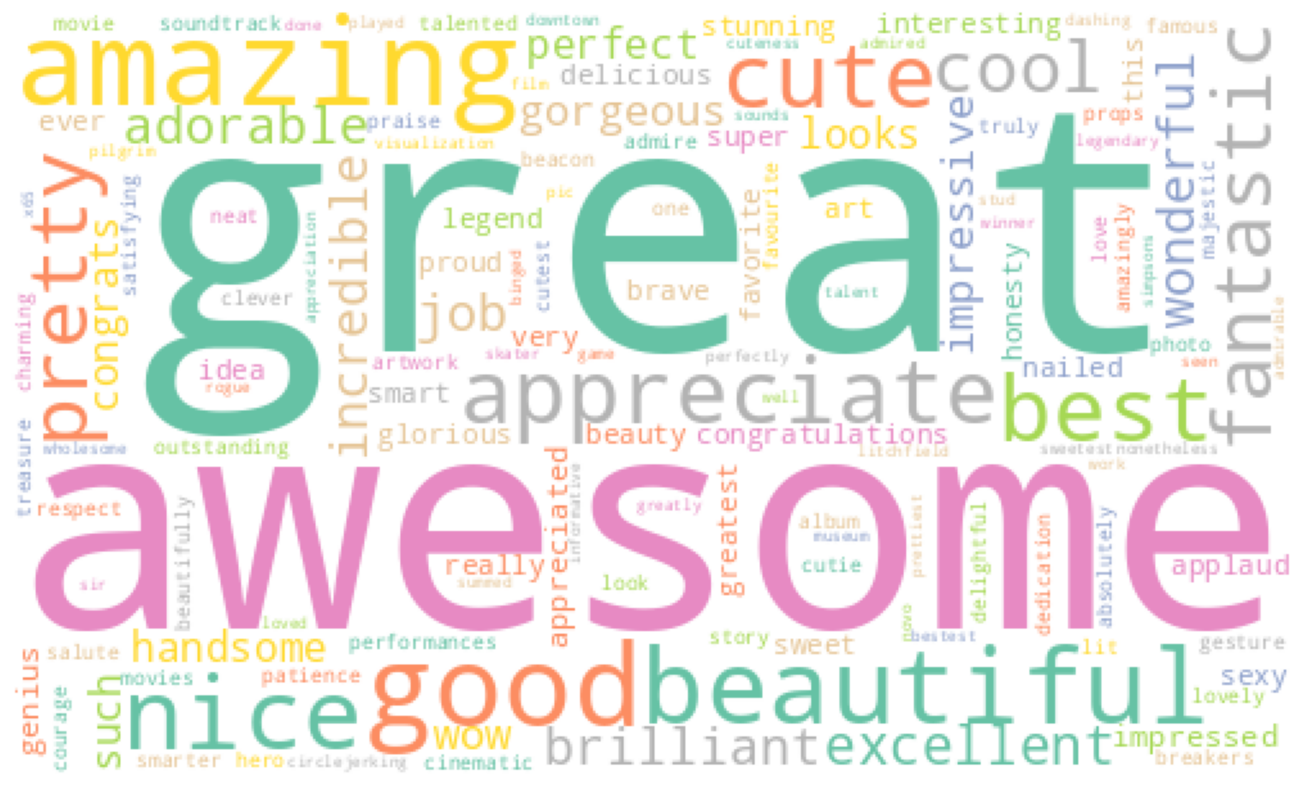

In [ ]:
plot_cloud(wordcloud.generate_from_frequencies(wc_dict['admiration']))

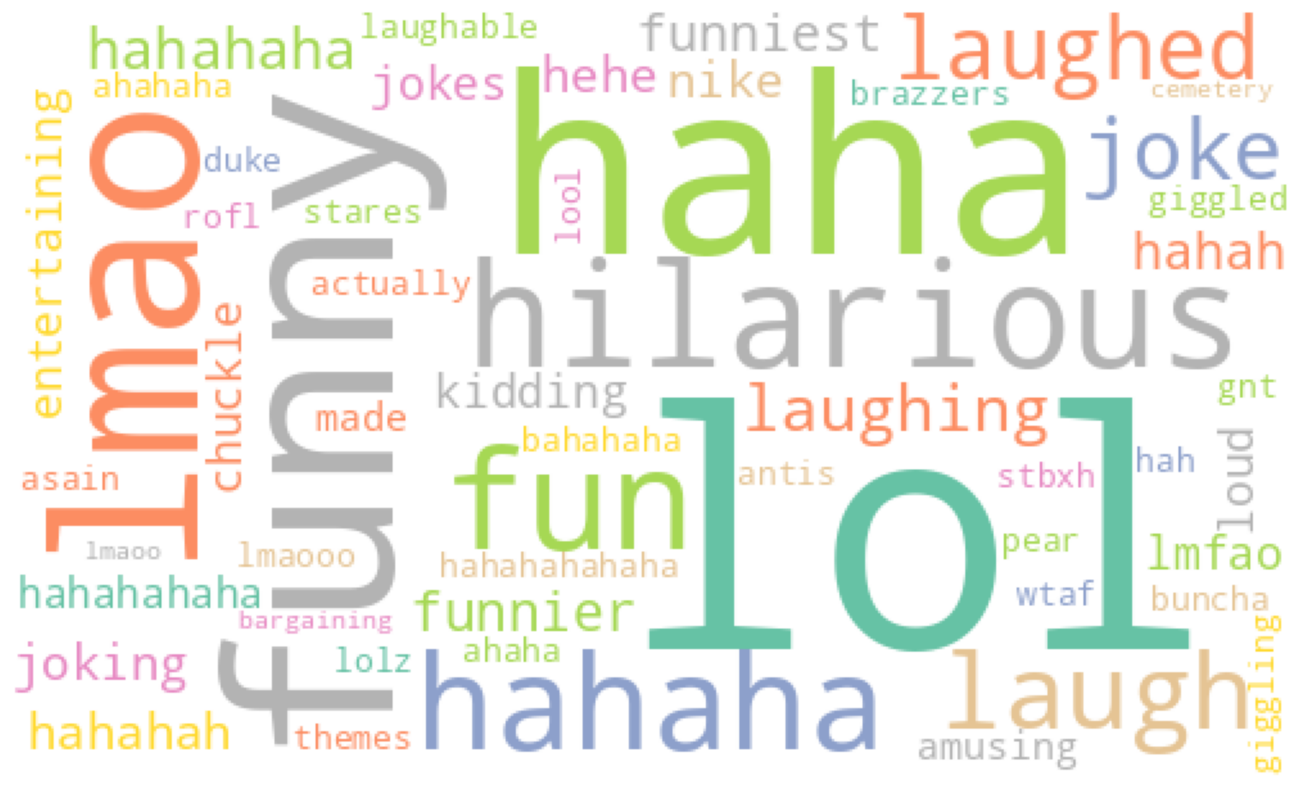

In [ ]:
plot_cloud(wordcloud.generate_from_frequencies(wc_dict['amusement']))

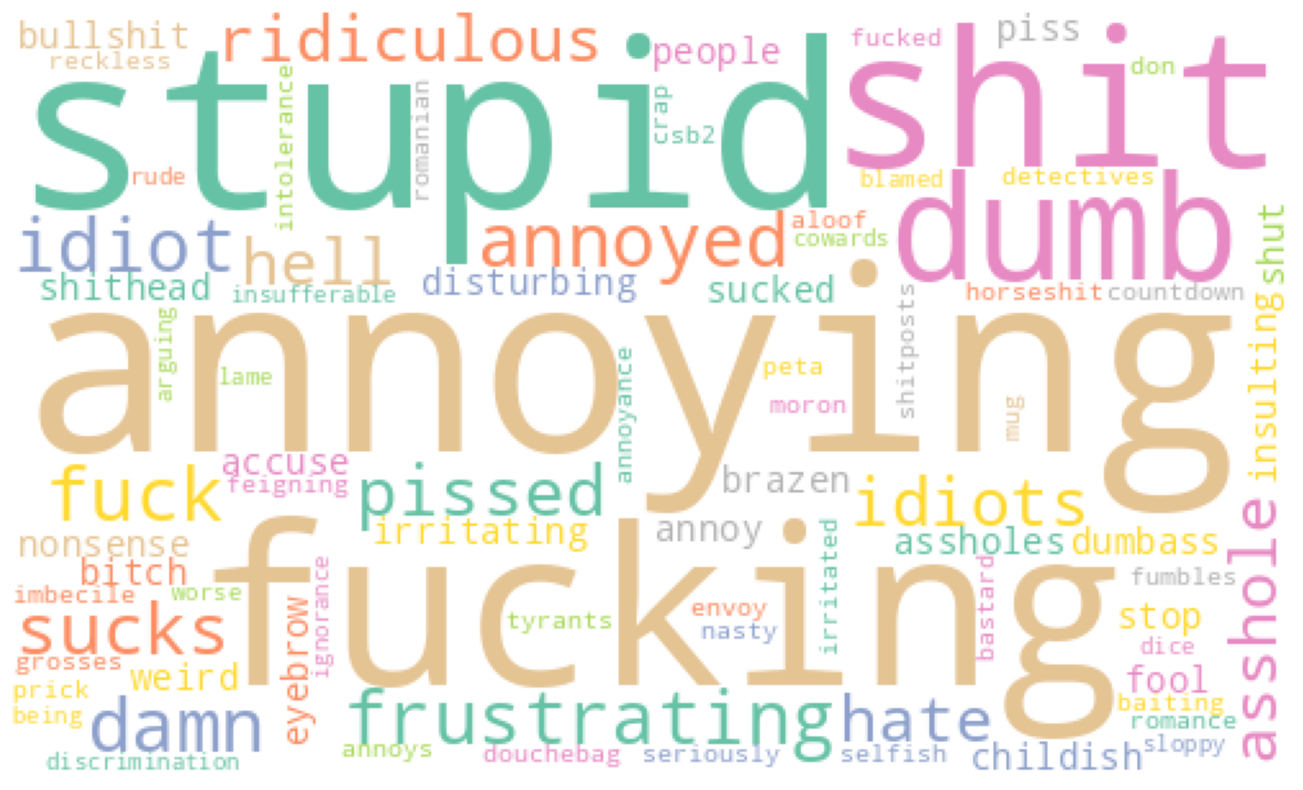

In [ ]:
plot_cloud(wordcloud.generate_from_frequencies(wc_dict['annoyance']))

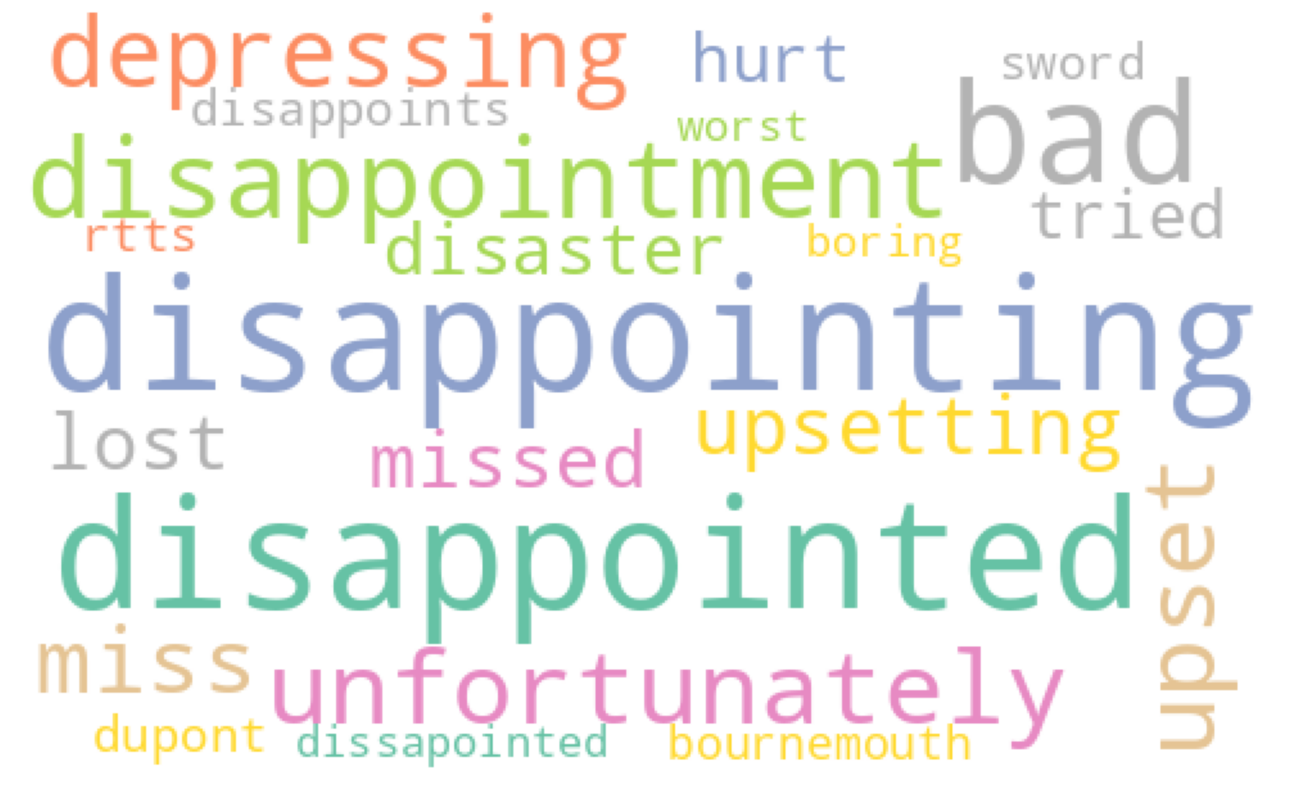

In [ ]:
plot_cloud(wordcloud.generate_from_frequencies(wc_dict['disappointment']))

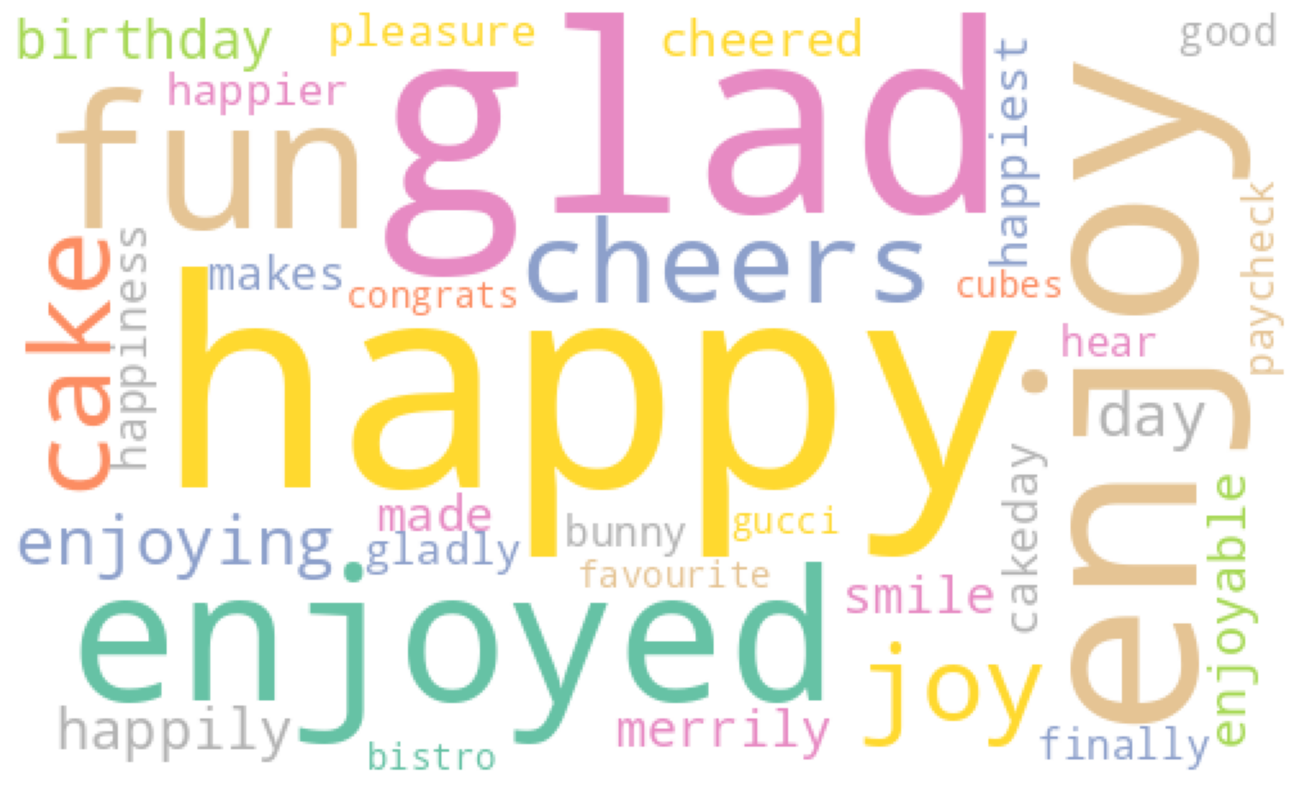

In [ ]:
plot_cloud(wordcloud.generate_from_frequencies(wc_dict['joy']))

In [ ]:
#data_train = data_train[['Text', 'Class']]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
# Split the 'Class' column into individual emotion labels
data['Class'] = data['Class'].str.split(',')
data = data.explode('Class')
X = data['Text']
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
data.head()

Text Class       ID  \
0  Is this in New Orleans?? I really feel like th...    27  edgurhb   
1  You know the answer man, you are programmed to...     4  ee84bjg   
1  You know the answer man, you are programmed to...    27  ee84bjg   
2               I've never been this sad in my life!    25  edcu99z   
3  The economy is heavily controlled and subsidiz...     4  edc32e2   

  List of classes  Length of classes  admiration  amusement  anger  annoyance  \
0            [27]                  1           0          0      0          0   
1         [4, 27]                  2           0          0      0          0   
1         [4, 27]                  2           0          0      0          0   
2            [25]                  1           0          0      0          0   
3         [4, 27]                  2           0          0      0          0   

   approval  caring  confusion  curiosity  desire  disappointment  \
0         0       0          0          0       0               0   
1         1       0          0          0       0               0   
1         1       0          0          0       0               0   
2         0       0          0          0       0               0   
3         1       0          0          0       0               0   

   disapproval  disgust  embarrassment  excitement  fear  gratitude  grief  \
0            0        0              0           0     0          0      0   
1            0        0              0           0     0          0      0   
1            0        0              0           0     0          0      0   
2            0        0              0           0     0          0      0   
3            0        0              0           0     0          0      0   

   joy  love  nervousness  optimism  pride  realization  relief  remorse  \
0    0     0            0         0      0            0       0        0   
1    0     0            0         0      0            0       0        0   
1    0     0            0         0      0            0       0        0   
2    0     0            0         0      0            0       0        0   
3    0     0            0         0      0            0       0        0   

   sadness  surprise  neutral  
0        0         0        1  
1        0         0        1  
1        0         0        1  
2        1         0        0  
3        0         0        1

**Applying Naive Bayes model**

In [ ]:

vec = CountVectorizer()
X_train_vec= vec.fit_transform(X_train)
X_test_vec= vec.transform(X_test)

clf = MultinomialNB(alpha=1.0)
clf.fit(X_train_vec, y_train)


MultinomialNB()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
y_predict = clf.predict(X_test_vec)
accuracy = accuracy_score(y_test, y_predict)
classification_report = classification_report(y_test, y_predict)
print("Accuracy:", acuracy)
print(f"Classification Report:\n{classification_report}")

Accuracy: 0.56
Classification Report:
              precision    recall  f1-score   support

           0       0.34      0.26      0.29        89
           1       0.33      0.04      0.07        71
          10       0.00      0.00      0.00        55
          11       0.00      0.00      0.00        22
          12       0.00      0.00      0.00         7
          13       0.00      0.00      0.00        19
          14       0.00      0.00      0.00        13
          15       0.70      0.65      0.67        82
          16       0.00      0.00      0.00         5
          17       0.60      0.07      0.13        41
          18       0.33      0.09      0.14        47
          19       0.00      0.00      0.00         4
           2       0.00      0.00      0.00        37
          20       0.27      0.08      0.12        38
          21       0.00      0.00      0.00         3
          22       0.00      0.00      0.00        26
          23       0.00      0.00      0.00

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



**Applying Logistic Regression Model**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
logreg = LogisticRegression()
logreg.fit(X_train_vec, y_train)
y_predict_log = logreg.predict(X_test_vec)
accuracy = accuracy_score(y_test, y_predict_log)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_predict_log))

Accuracy: 0.39
Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.40      0.42        89
           1       0.55      0.46      0.50        71
          10       0.10      0.07      0.09        55
          11       0.50      0.14      0.21        22
          12       0.00      0.00      0.00         7
          13       0.00      0.00      0.00        19
          14       0.14      0.08      0.10        13
          15       0.71      0.85      0.78        82
          16       0.00      0.00      0.00         5
          17       0.40      0.24      0.30        41
          18       0.53      0.60      0.56        47
          19       0.00      0.00      0.00         4
           2       0.21      0.14      0.16        37
          20       0.28      0.24      0.26        38
          21       0.00      0.00      0.00         3
          22       0.06      0.04      0.05        26
          23       0.00      0.00      0.00

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/loca

**Applying Random Forest Model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
random_model = RandomForestClassifier(n_estimators=100, random_state=42) 
random_model.fit(X_train_vec, y_train)
y_pred_random = random_model.predict(X_test_vec)
accuracy = accuracy_score(y_test, y_predict_log)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_predict_log))

Accuracy: 0.39
Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.40      0.42        89
           1       0.55      0.46      0.50        71
          10       0.10      0.07      0.09        55
          11       0.50      0.14      0.21        22
          12       0.00      0.00      0.00         7
          13       0.00      0.00      0.00        19
          14       0.14      0.08      0.10        13
          15       0.71      0.85      0.78        82
          16       0.00      0.00      0.00         5
          17       0.40      0.24      0.30        41
          18       0.53      0.60      0.56        47
          19       0.00      0.00      0.00         4
           2       0.21      0.14      0.16        37
          20       0.28      0.24      0.26        38
          21       0.00      0.00      0.00         3
          22       0.06      0.04      0.05        26
          23       0.00      0.00      0.00

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



**Applying SVM model**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

svm = SVC()
svm.fit(X_train_vec, y_train)
y_predict_svm = svm.predict(X_test_vec)
accuracy = accuracy_score(y_test, y_predict_svm)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_predict_svm))

Accuracy: 0.40
Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.37      0.40        89
           1       0.51      0.25      0.34        71
          10       0.00      0.00      0.00        55
          11       0.00      0.00      0.00        22
          12       0.00      0.00      0.00         7
          13       0.00      0.00      0.00        19
          14       0.00      0.00      0.00        13
          15       0.73      0.84      0.78        82
          16       0.00      0.00      0.00         5
          17       0.33      0.05      0.09        41
          18       0.54      0.60      0.57        47
          19       0.00      0.00      0.00         4
           2       0.20      0.03      0.05        37
          20       0.25      0.13      0.17        38
          21       0.00      0.00      0.00         3
          22       0.00      0.00      0.00        26
          23       0.00      0.00      0.00

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



**The Below code is using the emoji library in Python to convert class labels into corresponding emojis based on a predefined mapping.**

In [ ]:
import random
import emoji
emoji_mapping = {'0': ':neutral_face:', '1': ':smile:', '2': ':sad:', '3': ':angry:', '4': ':heart:', '5': ':grin:', '18': ':star-struck:', '27': ':partying_face:'}
emoji_dict = {0: '😐', 1: '😄', 2: '😢', 3: '😠', 4: '❤️', 5: '😂', 18: '😊', 27: '🥳'}


y_new_pred_emojis = []
for label in y_predict_log:
    str_label = str(label) if str(label) in emoji_mapping else '1' 
    emoji_alias = emoji_mapping[str_label]
    emoji_emoji = emoji.emojize(emoji_alias, language='alias')
    y_new_pred_emojis.append(emoji_emoji)

print("Predicted Emojis for Test Data:")
for i in range(len(X_test)):
    print("Sentence: " + X_test.iloc[i])
    random_emoji = random.choice(y_new_pred_emojis)
    random_emoji = emoji.emojize(random_emoji, language='alias') 
    print("Predicted Emoji is: " + random_emoji)
    print("-------")


Predicted Emojis for Test Data:
Sentence: Happy birthday [NAME]!
Predicted Emoji is: 🥳
-------
Sentence: no, mostly just spurred from mild boredom and thinking of the [NAME] future. Getting a gauge at the caliber of players chosen at #12.
Predicted Emoji is: 🥳
-------
Sentence: I teach the same students and one of them argued that poverty was a choice. It was an...interesting class discussion.
Predicted Emoji is: 🥳
-------
Sentence: Just put ice on it man
Predicted Emoji is: ❤️
-------
Sentence: I never said they didn't test it lol, I said they haven't tested it on PTR, which they haven't.
Predicted Emoji is: 🥳
-------
Sentence: You can be partners without being codependant, you can also keep your individuality without worrying or hurting your relationship. Its all about communication.
Predicted Emoji is: 😄
-------
Sentence: It seems like that’s what a lot of people are expecting.
Predicted Emoji is: 🥳
-------
Sentence: The huge attention paid by powerful male republicans takes makes a

**The provided code appears to be related to a classification task involving emotion prediction, where class labels are converted into corresponding emojis using Python's emoji library. By using the predicted class labels, the code reads data, performs some data processing and visualization, and predicts emojis for the test data.**